# eCommerce Analysis

## Objective:
    1. Pareto Analysis - Top Customers & Products
    2. Cohort analysis
    3. RFM analysis
    4. Clustering - product suggestions

In [133]:
import datetime as dt

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# from paretochart import pareto

In [134]:
data = pd.read_excel('Online Retail.xlsx')

In [135]:
data.head(n=5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [136]:
data.sample(n = 5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
62862,541516,22488,NATURAL SLATE RECTANGLE CHALKBOARD,4,2011-01-18 17:34:00,3.29,NaN,United Kingdom
347314,567297,82484,WOOD BLACK BOARD ANT WHITE FINISH,2,2011-09-19 12:27:00,7.95,15594.0,United Kingdom
525383,580615,21523,DOORMAT FANCY FONT HOME SWEET HOME,4,2011-12-05 12:05:00,8.25,16873.0,United Kingdom
380999,569844,21672,WHITE SPOT RED CERAMIC DRAWER KNOB,12,2011-10-06 13:30:00,1.45,12626.0,Germany
289750,562283,20727,LUNCH BAG BLACK SKULL.,10,2011-08-04 10:43:00,1.65,15249.0,United Kingdom


In [137]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null datetime64[ns]
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [138]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [139]:
data.corr()

,Quantity,UnitPrice,CustomerID
Quantity,1.000000,-0.001235,-0.00360
UnitPrice,-0.001235,1.000000,-0.00456
CustomerID,-0.003600,-0.004560,1.00000


## Initial Learnings of the Data:
    1. Whole sales business. Median qty is 3, mean qty is almost 10 units and max qty is 81000 units per product/invoice.
    2. Usual Retail phenomenon of Negative Correlation between unit price and qty.

In [140]:
# Creating a column of Sales. qty*price
data['Sales'] = data.UnitPrice * data.Quantity

# Extracting year and month from the invoicedate.
data['year']=pd.DatetimeIndex(data.InvoiceDate).year
data['month']=pd.DatetimeIndex(data.InvoiceDate).month
data['week'] = pd.DatetimeIndex(data.InvoiceDate).week

# Creating a concatenated column
data['Month'] = pd.to_datetime(data['year'].astype(str) + '-' + data['month'].astype(str), format = '%Y-%m')
data['Week'] = data['year'].astype(str) + '-' + data['week'].astype(str)
 
# Dropping the columns year and month
data.drop(['year','month','week'],axis =1, inplace =True)

data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales,Month,Week
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12-01,2010-48
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,2010-48
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12-01,2010-48
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,2010-48
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,2010-48


In [141]:
miss_data = data.isna().sum()
miss_data_percent = 100*data.isna().sum()/len(data)

miss_table = pd.concat([miss_data, miss_data_percent], axis= 1)
miss_table.columns = ['missing values', '% of data missing']

miss_table.sort_values(by='missing values', ascending=False, inplace= True)

miss_table

,missing values,% of data missing
CustomerID,135080,24.926694
Description,1454,0.268311
InvoiceNo,0,0.000000
StockCode,0,0.000000
Quantity,0,0.000000
InvoiceDate,0,0.000000
UnitPrice,0,0.000000
Country,0,0.000000
Sales,0,0.000000
Month,0,0.000000


In [142]:
data.dropna(axis = 0, subset = ['CustomerID'], inplace= True)
data.describe()

,Quantity,UnitPrice,CustomerID,Sales
count,406829.000000,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570,20.401854
std,248.693370,69.315162,1713.600303,427.591718
min,-80995.000000,0.000000,12346.000000,-168469.600000
25%,2.000000,1.250000,13953.000000,4.200000
50%,5.000000,1.950000,15152.000000,11.100000
75%,12.000000,3.750000,16791.000000,19.500000
max,80995.000000,38970.000000,18287.000000,168469.600000


In [143]:
data.drop_duplicates(subset=['InvoiceNo', 'StockCode','Quantity'])

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales,Month,Week
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12-01,2010-48
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,2010-48
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12-01,2010-48
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,2010-48
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,2010-48
...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20,2011-12-01,2011-49
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,2011-12-01,2011-49
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2011-12-01,2011-49
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2011-12-01,2011-49


In [144]:
data[data['CustomerID'].isna()]['Sales'].sum()

0.0

In [145]:
# Creating a new grouped table. grouping by customer wise sales and sort descending. 
cust_sales = data.groupby('CustomerID').sum().drop(['Quantity', 'UnitPrice'], axis =1)
cust_sales = cust_sales.sort_values(ascending= False, by="Sales")

# CustomerID into numeric indexes.
cust_sales.index = np.arange(1,(len(cust_sales)+1))

# Creating a new column for Cummulative Sales.
cust_sales['cumSales'] = cust_sales['Sales'].cumsum()

# Rounding to 0 decimals
cust_sales = cust_sales.round(decimals=0)

print(cust_sales.head())

      Sales  cumSales
1  279489.0  279489.0
2  256438.0  535928.0
3  187482.0  723410.0
4  132573.0  855982.0
5  123725.0  979708.0


In [146]:
cust_sales['index'] =cust_sales.index
cust_sales.head()

,Sales,cumSales,index
1,279489.0,279489.0,1
2,256438.0,535928.0,2
3,187482.0,723410.0,3
4,132573.0,855982.0,4
5,123725.0,979708.0,5


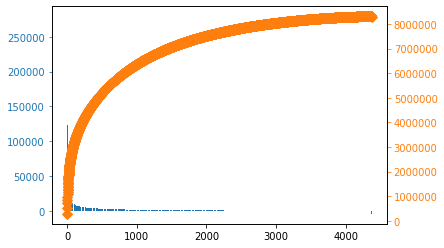

In [147]:
fig, ax = plt.subplots()
ax.bar(cust_sales.index, cust_sales["Sales"], color="C0")
ax2 = ax.twinx()
ax2.plot(cust_sales.index, cust_sales["cumSales"], color="C1", marker="D", ms=7)
# ax2.yaxis.set_major_formatter(PercentFormatter())

ax.tick_params(axis="y", colors="C0")
ax2.tick_params(axis="y", colors="C1")
plt.show()

In [148]:
fig = px.line(cust_sales, x="index", y="cumSales", width=600, height=400)
fig.show()

In [149]:
# plt.figure(figsize= (15,8))

# pareto(x = cust_sales.index, y = cust_sales['Sales'], axes = axes[0,1], limit = 0.8)

# plt.show

# # plt.bar(x= cust_sales.index, height=cust_sales['Sales'])

# #plt.plot(x = cust_sales.index, height = cust_sales['cumSales'] )

# #plt.ylim(0,20000)

In [150]:
#Mon_Sales=data.groupby('Month').sum().drop(['CustomerID', 'Quantity', 'UnitPrice'], axis =1)

In [151]:
data.groupby('InvoiceNo').sum().drop(['CustomerID', 'Quantity', 'UnitPrice'], axis =1)

,Sales
InvoiceNo,
536365,139.12
536366,22.20
536367,278.73
536368,70.05
536369,17.85
...,...
C581484,-168469.60
C581490,-32.53
C581499,-224.69


# Cohort Analysis

In [152]:
cohorts = data.groupby('CustomerID')['Month']
data['coh_month'] = cohorts.transform('min')
data.sample(n=10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales,Month,Week,coh_month
115263,546115,22381,TOY TIDY PINK POLKADOT,5,2011-03-09 13:50:00,2.10,15379.0,United Kingdom,10.50,2011-03-01,2011-10,2010-12-01
479043,577127,22952,60 CAKE CASES VINTAGE CHRISTMAS,24,2011-11-17 19:27:00,0.55,16871.0,United Kingdom,13.20,2011-11-01,2011-46,2011-03-01
175577,551966,85123A,WHITE HANGING HEART T-LIGHT HOLDER,7,2011-05-05 13:14:00,2.95,15356.0,United Kingdom,20.65,2011-05-01,2011-18,2010-12-01
42431,539988,22207,FRYING PAN UNION FLAG,1,2010-12-23 16:06:00,4.25,18116.0,United Kingdom,4.25,2010-12-01,2010-51,2010-12-01
367509,568895,23208,LUNCH BAG VINTAGE LEAF DESIGN,5,2011-09-29 13:11:00,1.65,15356.0,United Kingdom,8.25,2011-09-01,2011-39,2010-12-01
146314,548984,22726,ALARM CLOCK BAKELIKE GREEN,1,2011-04-05 12:37:00,3.75,14546.0,United Kingdom,3.75,2011-04-01,2011-14,2011-04-01
222621,556440,20992,JAZZ HEARTS PURSE NOTEBOOK,48,2011-06-10 14:51:00,0.39,14401.0,United Kingdom,18.72,2011-06-01,2011-23,2010-12-01
84272,543373,21703,BAG 125g SWIRLY MARBLES,12,2011-02-07 15:04:00,0.42,16945.0,United Kingdom,5.04,2011-02-01,2011-6,2010-12-01
362478,568491,23300,GARDENERS KNEELING PAD CUP OF TEA,2,2011-09-27 11:58:00,1.65,15443.0,United Kingdom,3.30,2011-09-01,2011-39,2011-01-01
87975,543740,22774,RED DRAWER KNOB ACRYLIC EDWARDIAN,192,2011-02-11 13:36:00,1.06,15311.0,United Kingdom,203.52,2011-02-01,2011-6,2010-12-01


In [153]:
data.coh_month.value_counts()

2010-12-01    177272
2011-01-01     49047
2011-03-01     33646
2011-02-01     30136
2011-04-01     19547
2011-10-01     16428
2011-05-01     15607
2011-09-01     14419
2011-06-01     13686
2011-08-01     12987
2011-11-01     12401
2011-07-01     10657
2011-12-01       996
Name: coh_month, dtype: int64

In [187]:
cohorts.transform('min')

0        2010-12-01
1        2010-12-01
2        2010-12-01
3        2010-12-01
4        2010-12-01
            ...    
541904   2011-08-01
541905   2011-08-01
541906   2011-08-01
541907   2011-08-01
541908   2011-08-01
Name: Month, Length: 406829, dtype: datetime64[ns]

In [155]:
pd.crosstab(data['coh_month'],data['Month'], values=data['CustomerID'],aggfunc=pd.Series.nunique)

Month,2010-12-01,2011-01-01,2011-02-01,2011-03-01,2011-04-01,2011-05-01,2011-06-01,2011-07-01,2011-08-01,2011-09-01,2011-10-01,2011-11-01,2011-12-01
coh_month,,,,,,,,,,,,,
2010-12-01,948.0,362.0,317.0,367.0,341.0,376.0,360.0,336.0,336.0,374.0,354.0,474.0,260.0
2011-01-01,NaN,421.0,101.0,119.0,102.0,138.0,126.0,110.0,108.0,131.0,146.0,155.0,63.0
2011-02-01,NaN,NaN,380.0,94.0,73.0,106.0,102.0,94.0,97.0,107.0,98.0,119.0,35.0
2011-03-01,NaN,NaN,NaN,440.0,84.0,112.0,96.0,102.0,78.0,116.0,105.0,127.0,39.0
2011-04-01,NaN,NaN,NaN,NaN,299.0,68.0,66.0,63.0,62.0,71.0,69.0,78.0,25.0
2011-05-01,NaN,NaN,NaN,NaN,NaN,279.0,66.0,48.0,48.0,60.0,68.0,74.0,29.0
2011-06-01,NaN,NaN,NaN,NaN,NaN,NaN,235.0,49.0,44.0,64.0,58.0,79.0,24.0
2011-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,191.0,40.0,39.0,44.0,52.0,22.0
2011-08-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,167.0,42.0,42.0,42.0,23.0


In [156]:
# Indexing the months as 1,2,3 with reference to the coh_month.

# Extracting year and month from the invoicedate.
data['year'] = (pd.DatetimeIndex(data.Month).year) - (pd.DatetimeIndex(data.coh_month).year)
data['month'] = (pd.DatetimeIndex(data.Month).month) - (pd.DatetimeIndex(data.coh_month).month)
                                                                  
# Creating the cohort indices for cohort analysis                                                                  
data['coh_index'] = data['year']*12 + data['month'] + 1

# Dropping the columns year & month                                                              
data.drop(['year', 'month'], axis = 1, inplace= True)

In [157]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 13 columns):
InvoiceNo      406829 non-null object
StockCode      406829 non-null object
Description    406829 non-null object
Quantity       406829 non-null int64
InvoiceDate    406829 non-null datetime64[ns]
UnitPrice      406829 non-null float64
CustomerID     406829 non-null float64
Country        406829 non-null object
Sales          406829 non-null float64
Month          406829 non-null datetime64[ns]
Week           406829 non-null object
coh_month      406829 non-null datetime64[ns]
coh_index      406829 non-null int64
dtypes: datetime64[ns](3), float64(3), int64(2), object(5)
memory usage: 43.5+ MB


In [158]:
data['coh_index'].value_counts()

1     119191
2      29147
4      28075
6      27576
3      27493
5      25926
12     24520
7      24214
8      24200
10     24075
9      23672
11     21331
13      7409
Name: coh_index, dtype: int64

In [159]:
return_cust = pd.crosstab(data['coh_month'], data['coh_index'], values=data['CustomerID'],aggfunc=pd.Series.nunique)
return_cust

coh_index,1,2,3,4,5,6,7,8,9,10,11,12,13
coh_month,,,,,,,,,,,,,
2010-12-01,948.0,362.0,317.0,367.0,341.0,376.0,360.0,336.0,336.0,374.0,354.0,474.0,260.0
2011-01-01,421.0,101.0,119.0,102.0,138.0,126.0,110.0,108.0,131.0,146.0,155.0,63.0,NaN
2011-02-01,380.0,94.0,73.0,106.0,102.0,94.0,97.0,107.0,98.0,119.0,35.0,NaN,NaN
2011-03-01,440.0,84.0,112.0,96.0,102.0,78.0,116.0,105.0,127.0,39.0,NaN,NaN,NaN
2011-04-01,299.0,68.0,66.0,63.0,62.0,71.0,69.0,78.0,25.0,NaN,NaN,NaN,NaN
2011-05-01,279.0,66.0,48.0,48.0,60.0,68.0,74.0,29.0,NaN,NaN,NaN,NaN,NaN
2011-06-01,235.0,49.0,44.0,64.0,58.0,79.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,191.0,40.0,39.0,44.0,52.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,167.0,42.0,42.0,42.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
cohorts = data.groupby('CustomerID')['Month']
data['coh_month'] = cohorts.transform('min')

# Indexing the months as 1,2,3 with reference to the coh_month.

# Extracting year and month from the invoicedate.
data['year'] = (pd.DatetimeIndex(data.Month).year) - (pd.DatetimeIndex(data.coh_month).year)
data['month'] = (pd.DatetimeIndex(data.Month).month) - (pd.DatetimeIndex(data.coh_month).month)
                                                                  
# Creating the cohort indices for cohort analysis                                                                  
data['coh_index'] = data['year']*12 + data['month'] + 1

# Dropping the columns year & month                                                              
data.drop(['year', 'month'], axis = 1, inplace= True)

return_cust = pd.crosstab(data['coh_month'], data['coh_index'], 
                          values=data['CustomerID'],aggfunc=pd.Series.nunique)

In [160]:
coh_size = return_cust.iloc[:,0]
coh_size

coh_month
2010-12-01    948.0
2011-01-01    421.0
2011-02-01    380.0
2011-03-01    440.0
2011-04-01    299.0
2011-05-01    279.0
2011-06-01    235.0
2011-07-01    191.0
2011-08-01    167.0
2011-09-01    298.0
2011-10-01    352.0
2011-11-01    321.0
2011-12-01     41.0
Name: 1, dtype: float64

In [161]:
return_rate = return_cust.divide(coh_size,axis=0)*100

return_rate.round(0)

coh_index,1,2,3,4,5,6,7,8,9,10,11,12,13
coh_month,,,,,,,,,,,,,
2010-12-01,100.0,38.0,33.0,39.0,36.0,40.0,38.0,35.0,35.0,39.0,37.0,50.0,27.0
2011-01-01,100.0,24.0,28.0,24.0,33.0,30.0,26.0,26.0,31.0,35.0,37.0,15.0,NaN
2011-02-01,100.0,25.0,19.0,28.0,27.0,25.0,26.0,28.0,26.0,31.0,9.0,NaN,NaN
2011-03-01,100.0,19.0,25.0,22.0,23.0,18.0,26.0,24.0,29.0,9.0,NaN,NaN,NaN
2011-04-01,100.0,23.0,22.0,21.0,21.0,24.0,23.0,26.0,8.0,NaN,NaN,NaN,NaN
2011-05-01,100.0,24.0,17.0,17.0,22.0,24.0,27.0,10.0,NaN,NaN,NaN,NaN,NaN
2011-06-01,100.0,21.0,19.0,27.0,25.0,34.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,100.0,21.0,20.0,23.0,27.0,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,100.0,25.0,25.0,25.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [162]:
list(return_rate.max().sort_values(ascending = False))[1]

50.0

Text(371.3700000000001, 0.5, '<------Cohort Months-------')

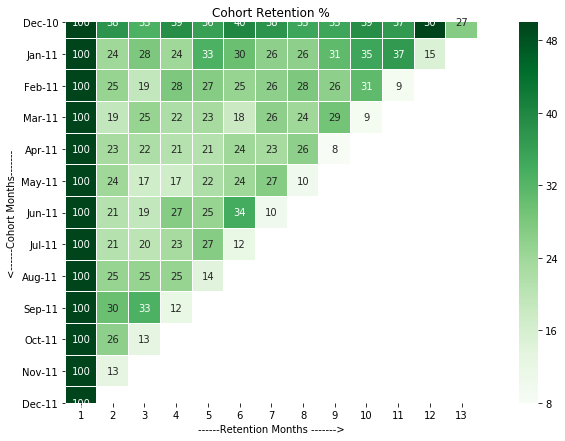

In [188]:
mon_names = ['Dec-10', 'Jan-11', 'Feb-11', 'Mar-11', 'Apr-11', 'May-11', 'Jun-11', 
             'Jul-11', 'Aug-11', 'Sep-11', 'Oct-11', 'Nov-11', 'Dec-11']

plt.figure(figsize=(15,7))

sns.heatmap(data = round(return_rate,0),
            annot = True,
            cmap = ('Greens'),
            vmax = list(return_rate.max().sort_values(ascending = False))[1],
            yticklabels = mon_names,
            fmt = '.0f',
            linewidth = 0.01, square=True)

plt.title("Cohort Retention %")
plt.xlabel("------Retention Months ------->")
plt.ylabel("<------Cohort Months-------")

In [164]:
data.groupby('coh_month')['coh_index']

In [165]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales,Month,Week,coh_month,coh_index
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12-01,2010-48,2010-12-01,1
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,2010-48,2010-12-01,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12-01,2010-48,2010-12-01,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,2010-48,2010-12-01,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,2010-48,2010-12-01,1


In [166]:
coh_spends = pd.crosstab(data['coh_month'], data['coh_index'], values=data['Sales'], aggfunc= pd.Series.mean).round(0)

coh_spends

coh_index,1,2,3,4,5,6,7,8,9,10,11,12,13
coh_month,,,,,,,,,,,,,
2010-12-01,21.0,25.0,25.0,25.0,20.0,25.0,26.0,25.0,26.0,31.0,31.0,22.0,25.0
2011-01-01,18.0,23.0,20.0,18.0,22.0,25.0,24.0,25.0,19.0,20.0,19.0,18.0,NaN
2011-02-01,17.0,17.0,19.0,19.0,16.0,15.0,22.0,21.0,17.0,21.0,22.0,NaN,NaN
2011-03-01,17.0,18.0,21.0,17.0,19.0,18.0,22.0,17.0,15.0,11.0,NaN,NaN,NaN
2011-04-01,16.0,20.0,19.0,18.0,19.0,14.0,15.0,15.0,12.0,NaN,NaN,NaN,NaN
2011-05-01,19.0,16.0,21.0,19.0,18.0,14.0,16.0,13.0,NaN,NaN,NaN,NaN,NaN
2011-06-01,16.0,15.0,19.0,20.0,15.0,16.0,13.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,13.0,21.0,11.0,12.0,11.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,16.0,12.0,12.0,14.0,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Text(114.0, 0.5, '<------Cohort Months-------')

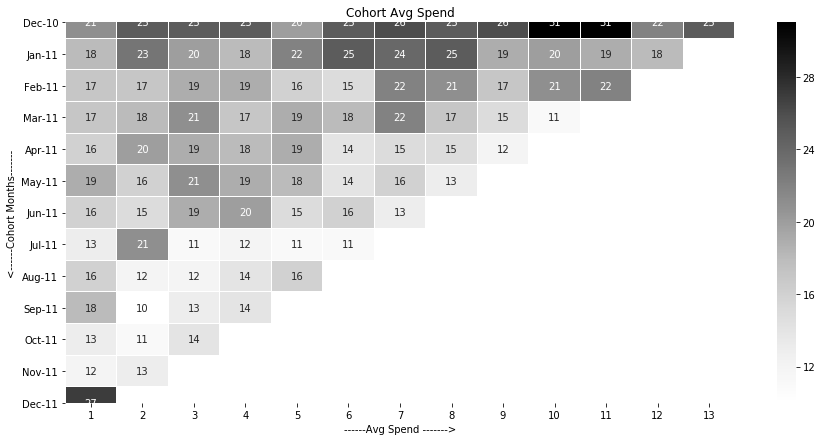

In [167]:
mon_names = ['Dec-10', 'Jan-11', 'Feb-11', 'Mar-11', 'Apr-11', 'May-11', 'Jun-11', 'Jul-11', 'Aug-11', 'Sep-11', 'Oct-11', 'Nov-11', 'Dec-11']

plt.figure(figsize=(15,7))



sns.heatmap(data = round(coh_spends,0),
            annot=True,
            cmap = ('Greys'),
            vmax=list(coh_spends.max().sort_values(ascending = False))[0], 
            yticklabels = mon_names,
            fmt = '.0f',
            linewidth = 0.01
           )

plt.title("Cohort Avg Spend")
plt.xlabel("------Avg Spend ------->")
plt.ylabel("<------Cohort Months-------")

# RFM Analysis

In [168]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 13 columns):
InvoiceNo      406829 non-null object
StockCode      406829 non-null object
Description    406829 non-null object
Quantity       406829 non-null int64
InvoiceDate    406829 non-null datetime64[ns]
UnitPrice      406829 non-null float64
CustomerID     406829 non-null float64
Country        406829 non-null object
Sales          406829 non-null float64
Month          406829 non-null datetime64[ns]
Week           406829 non-null object
coh_month      406829 non-null datetime64[ns]
coh_index      406829 non-null int64
dtypes: datetime64[ns](3), float64(3), int64(2), object(5)
memory usage: 63.5+ MB


In [169]:
# Converting to proper date format
data['InvoiceDate'] = data['InvoiceDate'].dt.date

# Creating a column of latest Purchase date, max of invoice date for each customer.
cus_invoices = data.groupby('CustomerID')['InvoiceDate']
data['latest_date'] = cus_invoices.transform('max')

# Days since the last purchase
data['recency'] = tdy - data['latest_date']

# dropping the column latest_date 
data.drop(['latest_date'], axis=1, inplace= True)

rfm_table = data.groupby(['CustomerID', 'recency']).agg({'InvoiceNo':'count','Sales':sum})
rfm_table = rfm_table.reset_index()
rfm_table = rfm_table.sort_values(by=['Sales', 'recency'], ascending= [False,True])
rfm_table.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']
rfm_table.head()

,CustomerID,Recency,Frequency,Monetary
1703,14646.0,2 days,2085,279489.02
4233,18102.0,1 days,433,256438.49
3758,17450.0,9 days,351,187482.17
1895,14911.0,2 days,5903,132572.62
55,12415.0,25 days,778,123725.45


In [170]:
rfm_table.describe()

,CustomerID,Recency,Frequency,Monetary
count,4372.000000,4372,4372.000000,4372.000000
mean,15299.677722,92 days 13:56:55.553522,93.053294,1898.459701
std,1722.390705,100 days 18:31:52.836716,232.471608,8219.345141
min,12346.000000,1 days 00:00:00,1.000000,-4287.630000
25%,13812.750000,17 days 00:00:00,17.000000,293.362500
50%,15300.500000,51 days 00:00:00,42.000000,648.075000
75%,16778.250000,144 days 00:00:00,102.000000,1611.725000
max,18287.000000,374 days 00:00:00,7983.000000,279489.020000


In [171]:
rfm_table['Rec_grd'] = pd.qcut(rfm_table['Recency'], q = 5, labels=np.arange(5,0,-1))
rfm_table['Frq_grd'] = pd.qcut(rfm_table['Frequency'], q = 5, labels=np.arange(1,6))
rfm_table['Mon_grd'] = pd.qcut(rfm_table['Monetary'], q = 5, labels=np.arange(1,6))

rfm_table.sample(10)

,CustomerID,Recency,Frequency,Monetary,Rec_grd,Frq_grd,Mon_grd
3216,16706.0,38 days,123,531.35,3,4,3
3842,17564.0,25 days,49,454.01,4,3,2
2680,15975.0,85 days,24,371.01,2,2,2
1787,14760.0,295 days,7,53.80,1,1,1
562,13079.0,5 days,6,220.10,5,1,1
2930,16315.0,331 days,14,226.37,1,1,1
3871,17604.0,218 days,63,309.36,1,4,2
2595,15844.0,47 days,11,130.74,3,1,1
1782,14755.0,10 days,237,4965.38,5,5,5
1434,14282.0,4 days,156,3729.34,5,5,5


In [172]:
rfm_table['MRF_score'] = (rfm_table['Mon_grd'].astype('str')) + (rfm_table['Frq_grd'].astype('str')) + (rfm_table['Rec_grd'].astype('str'))

rfm_table['MRF_score']

rfm_table.head(20)

,CustomerID,Recency,Frequency,Monetary,Rec_grd,Frq_grd,Mon_grd,MRF_score
1703,14646.0,2 days,2085,279489.02,5,5,5,555
4233,18102.0,1 days,433,256438.49,5,5,5,555
3758,17450.0,9 days,351,187482.17,5,5,5,555
1895,14911.0,2 days,5903,132572.62,5,5,5,555
55,12415.0,25 days,778,123725.45,4,5,5,554
1345,14156.0,10 days,1420,113384.14,5,5,5,555
3801,17511.0,3 days,1076,88125.38,5,5,5,555
3202,16684.0,5 days,281,65892.08,5,5,5,555
1005,13694.0,4 days,585,62653.10,5,5,5,555
2192,15311.0,1 days,2491,59419.34,5,5,5,555


In [173]:
rfm_table.to_excel('rfm_knime_export.xlsx')

In [174]:
a = rfm_table.groupby(['MRF_score'])['CustomerID'].agg({'CustomerID': 'count', 'Monetary':sum})

a.reset_index()

C:\Users\imdevskp\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning:

using a dict on a Series for aggregation
is deprecated and will be removed in a future version. Use                 named aggregation instead.

    >>> grouper.agg(name_1=func_1, name_2=func_2)




,MRF_score,CustomerID,Monetary
0,111,287,4399892.0
1,112,122,1884315.0
2,113,95,1468452.0
3,114,65,993499.0
4,115,36,557873.0
...,...,...,...
115,551,8,124174.0
116,552,34,514727.0
117,553,85,1283494.0
118,554,162,2438494.0


In [175]:
a = a.sort_values(by=['Monetary'], ascending= [False])

a.head(20)

,CustomerID,Monetary
MRF_score,,
555,321,4849094.0
111,287,4399892.0
554,162,2438494.0
221,142,2142426.0
112,122,1884315.0
444,109,1684165.0
445,110,1661611.0
332,111,1649619.0
222,99,1496827.0


In [176]:
from sklearn.cluster import KMeans

model = KMeans(7)
model.fit(rfm_table[['Mon_grd', 'Frq_grd', 'Rec_grd']])
y_clusters = model.predict(rfm_table[['Mon_grd', 'Frq_grd', 'Rec_grd']])

print(y_clusters[:5])

rfm_table['cluster'] = y_clusters

[4 4 4 4 4]


In [177]:
type(y_clusters)

numpy.ndarray

In [178]:
rfm_clusters = rfm_table[['Mon_grd', 'Frq_grd', 'Rec_grd', 'cluster']]

In [179]:
unique_elements, counts_elements = np.unique(y_clusters, return_counts=True)
print("Frequency of unique values of the said array:")
print(np.asarray((unique_elements, counts_elements)))

Frequency of unique values of the said array:
[[  0   1   2   3   4   5   6]
 [626 500 591 598 718 658 681]]


In [180]:
import plotly.express as px
fig = px.scatter_3d(rfm_table, x="Recency", z="Frequency", y="Monetary", color="cluster")
fig.show()

In [181]:
fig = px.scatter_3d(rfm_table, x="Rec_grd", y="Frq_grd", z="Mon_grd", color="cluster")
fig.show()

# Rec_grd 	Frq_grd 	Mon_grd

In [182]:
df = rfm_table[['Recency', 'Frequency', 'Monetary', 'cluster']]
df.head()


,Recency,Frequency,Monetary,cluster
1703,2 days,2085,279489.02,4
4233,1 days,433,256438.49,4
3758,9 days,351,187482.17,4
1895,2 days,5903,132572.62,4
55,25 days,778,123725.45,4


In [183]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

for i in ['Recency', 'Frequency', 'Monetary']:
    scaler = StandardScaler()
    df[i] = scaler.fit_transform(df[[i]])
    
df.head()

C:\Users\imdevskp\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\imdevskp\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\imdevskp\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.

,Recency,Frequency,Monetary,cluster
1703,-0.898974,8.569539,33.776695,4
4233,-0.908899,1.462482,30.971950,4
3758,-0.829503,1.109711,22.581475,4
1895,-0.898974,24.994929,15.900185,4
55,-0.670710,2.946704,14.823678,4


In [184]:
fig = px.scatter_3d(df, x="Recency", y="Frequency", z="Monetary", color="cluster")
fig.show()

In [185]:
rfm_clusters = rfm_table[['Recency', 'Frequency', 'Monetary', 'cluster']]
rfm_clusters.groupby('cluster').mean()

,Frequency,Monetary
cluster,,
0,9.458466,145.951070
1,137.876000,2394.155982
2,49.025381,904.371728
3,27.255853,468.954753
4,316.558496,7240.942507
5,18.165653,284.861109
6,69.684288,1189.821571


In [186]:
rfm_table[['Recency', 'Frequency', 'Monetary', 'cluster']].head()

,Recency,Frequency,Monetary,cluster
1703,2 days,2085,279489.02,4
4233,1 days,433,256438.49,4
3758,9 days,351,187482.17,4
1895,2 days,5903,132572.62,4
55,25 days,778,123725.45,4
